<a href="https://colab.research.google.com/github/Arif24434/Data-Science-Project-Market-segmentation-analysis-/blob/main/Market_segmentation_Analysis_project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE
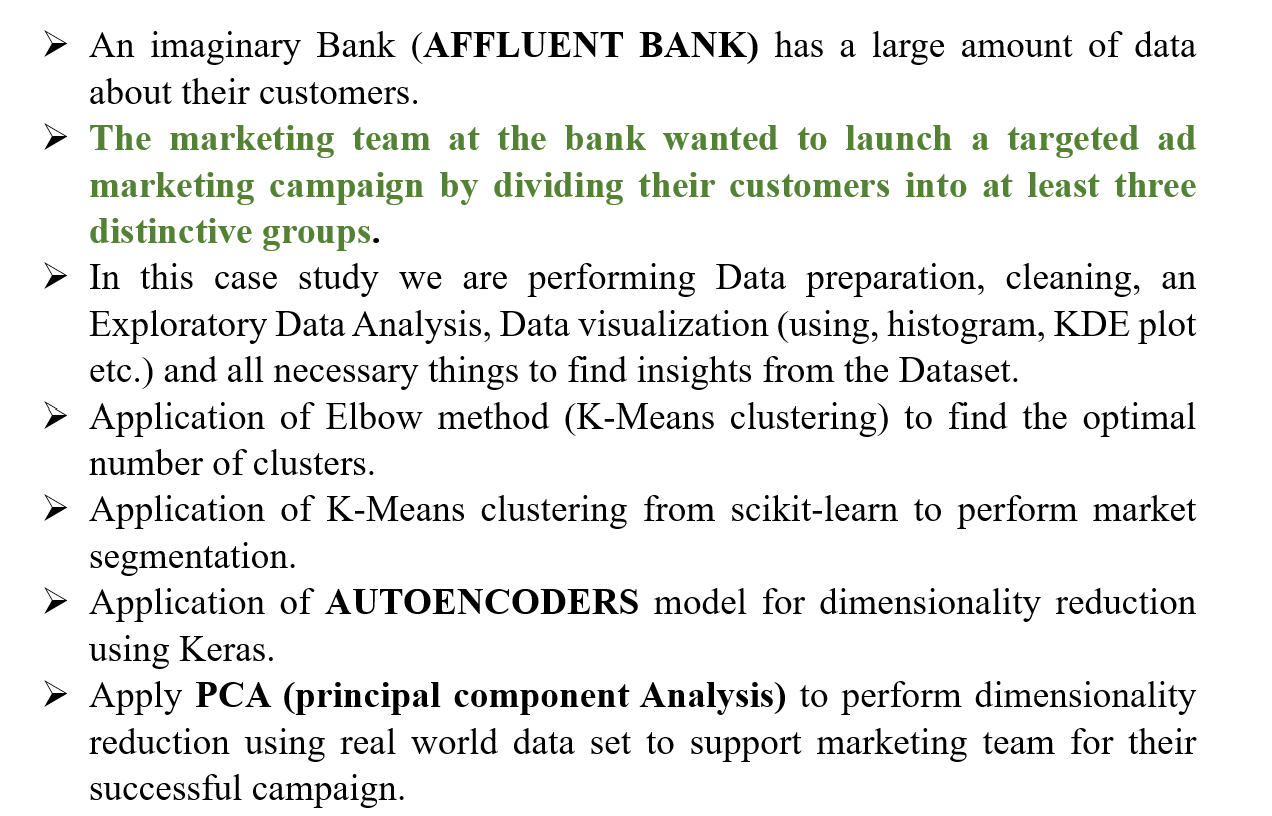

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
# Ignore all Pandas warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)



In [ ]:
# Mounting drive using the following commands:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# full link to the csv file containing the dataset
creditcard_df = pd.read_csv('/content/drive/MyDrive/@€@/Data Analysis projects/Marketing_Department_Project/My_Dataset.csv')


In [ ]:
pd.set_option('display.max_columns', None) # to display all columns
creditcard_df
#According to Data Dictionary the colums after 'TENURE'(no.17) are not necessary because there are no reference for them.
#Also The items on those columns are not relavent for this analysis.
#Data set elements explanation given below:
#CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CASH_ADVANCE_TRX.1,PURCHASES_TRX.1,CREDIT_LIMIT.1,PAYMENTS.1,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Unnamed: 27,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0,2.0,1000.0,201.802084,7.0,0.0,0.0,0.0,0.0,NaN,2021.0,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,4.0,0.0,7000.0,4103.032597,5.0,0.0,0.0,0.0,0.0,NaN,2021.0,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"674,890",ANZSIC06 divisions A-S (excluding classes K633...
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0,12.0,7500.0,622.066742,4.0,0.0,0.0,0.0,0.0,NaN,2021.0,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.000000,12.0,1.0,1.0,7500.0,0.000000,6.0,0.0,0.0,0.0,0.0,NaN,2021.0,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"33,020",ANZSIC06 divisions A-S (excluding classes K633...
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0,1.0,1200.0,678.334763,5.0,0.0,0.0,0.0,0.0,NaN,2021.0,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,404",ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8948,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,0.0,6.0,1000.0,325.594462,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Level 4,QQ113,Residential Care Services and Social Assistance,Percentage,H41,Liabilities structure,Financial ratios,49,"ANZSIC06 groups Q860, Q871, and Q879"
8949,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,NaN,0.000000,6.0,0.0,6.0,1000.0,275.861322,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Level 1,RS,"Arts, Recreation and Other Services",Dollars (millions),H01,Total income,Financial performance,"20,863",ANZSIC06 divisions R and S
8950,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,0.0,5.0,1000.0,81.270775,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Level 1,RS,"Arts, Recreation and Other Services",Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"18,446",ANZSIC06 divisions R and S
8951,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0,2.0,0.0,500.0,52.549959,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,Level 1,RS,"Arts, Recreation and Other Services",Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"2,074",ANZSIC06 divisions R and S


In [ ]:
print(creditcard_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8953 entries, 0 to 8952
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8952 non-null   object 
 1   BALANCE                           8952 non-null   float64
 2   BALANCE_FREQUENCY                 8952 non-null   float64
 3   PURCHASES                         8952 non-null   float64
 4   ONEOFF_PURCHASES                  8952 non-null   float64
 5   INSTALLMENTS_PURCHASES            8952 non-null   float64
 6   CASH_ADVANCE                      8952 non-null   float64
 7   PURCHASES_FREQUENCY               8952 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8952 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8952 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8952 non-null   float64
 11  CASH_ADVANCE_TRX                  8952 non-null   float64
 12  PURCHA

In [ ]:
# so I am dropping all un necessary column first
#But it looks like after 'TENURE' there are still some column similar from no.-17 column. we will check them later, frirt we need to drop unnecesssary column.
column_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'Unnamed: 27',
                  'Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC',
                  'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name',
                  'Variable_category', 'Value', 'Industry_code_ANZSIC06']

# Remove leading/trailing spaces from column names
column_to_drop = [col.strip() for col in column_to_drop]
# Drop selected columns
creditcard_df_dropped = creditcard_df.drop(columns=column_to_drop)

print(creditcard_df_dropped)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8948  C19186    28.493517           1.000000     291.12              0.00   
8949  C19187    19.183215           1.000000     300.00              0.00   
8950  C19188    23.398673           0.833333     144.40              0.00   
8951  C19189    13.457564           0.833333       0.00              0.00   
8952  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [ ]:
# dropping Duplicated cloumns
creditcard_df_dropped = creditcard_df_dropped.loc[:, ~creditcard_df_dropped.columns.duplicated()]
creditcard_df_dropped
creditcard_df_dropped.info()
#dropping again the duplicated cloumns
duplicated_column_to_drop = ['CASH_ADVANCE_TRX.1', 'PURCHASES_TRX.1', 'CREDIT_LIMIT.1', 'PAYMENTS.1', 'NumWebVisitsMonth']
# Remove leading/trailing spaces from column names
duplicated_column_to_drop = [col.strip() for col in duplicated_column_to_drop]
# Drop selected columns
creditcard_df_dropped_2 = creditcard_df_dropped.drop(columns=duplicated_column_to_drop)
creditcard_df_dropped_2
creditcard_df_dropped_2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8953 entries, 0 to 8952
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8952 non-null   object 
 1   BALANCE                           8952 non-null   float64
 2   BALANCE_FREQUENCY                 8952 non-null   float64
 3   PURCHASES                         8952 non-null   float64
 4   ONEOFF_PURCHASES                  8952 non-null   float64
 5   INSTALLMENTS_PURCHASES            8952 non-null   float64
 6   CASH_ADVANCE                      8952 non-null   float64
 7   PURCHASES_FREQUENCY               8952 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8952 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8952 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8952 non-null   float64
 11  CASH_ADVANCE_TRX                  8952 non-null   float64
 12  PURCHA

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df_dropped_2.duplicated().sum()

14

In [ ]:
# Dropping duplicated values
creditcard_df_dropped_2=creditcard_df_dropped_2.drop_duplicates()
creditcard_df_dropped_2.duplicated().sum()

0

In [ ]:
creditcard_df_dropped_2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8948,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8949,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,NaN,0.000000,6.0
8950,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8951,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


<Axes: >

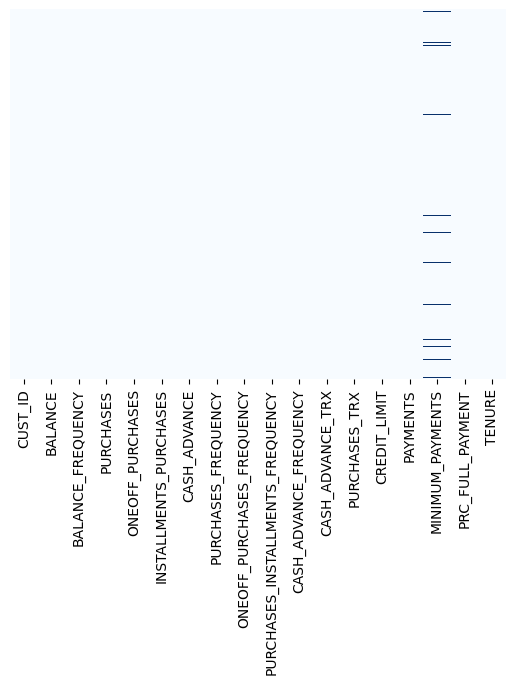

In [ ]:
# Let's see if we have any missing data. there is very less amount of missing/null value
sns.heatmap(creditcard_df_dropped_2.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
#let's check null value.
creditcard_df_dropped_2.isnull().sum()

CUST_ID                               1
BALANCE                               1
BALANCE_FREQUENCY                     1
PURCHASES                             1
ONEOFF_PURCHASES                      1
INSTALLMENTS_PURCHASES                1
CASH_ADVANCE                          1
PURCHASES_FREQUENCY                   1
ONEOFF_PURCHASES_FREQUENCY            1
PURCHASES_INSTALLMENTS_FREQUENCY      1
CASH_ADVANCE_FREQUENCY                1
CASH_ADVANCE_TRX                      1
PURCHASES_TRX                         1
CREDIT_LIMIT                          2
PAYMENTS                              1
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      1
TENURE                                1
dtype: int64

In [ ]:
# Select columns with missing values
columns_with_missing = creditcard_df_dropped_2.columns[creditcard_df_dropped_2.isnull().any()]

# Replace missing values in selected numeric columns with column means
for col in columns_with_missing:
    if pd.api.types.is_numeric_dtype(creditcard_df_dropped_2[col]):
        col_mean = creditcard_df_dropped_2[col].mean()
        creditcard_df_dropped_2[col].fillna(col_mean, inplace=True)

print(creditcard_df_dropped_2)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8948  C19186    28.493517           1.000000     291.12              0.00   
8949  C19187    19.183215           1.000000     300.00              0.00   
8950  C19188    23.398673           0.833333     144.40              0.00   
8951  C19189    13.457564           0.833333       0.00              0.00   
8952  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [ ]:
#let's check null value once Again.
creditcard_df_dropped_2.isnull().sum()

CUST_ID                             1
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

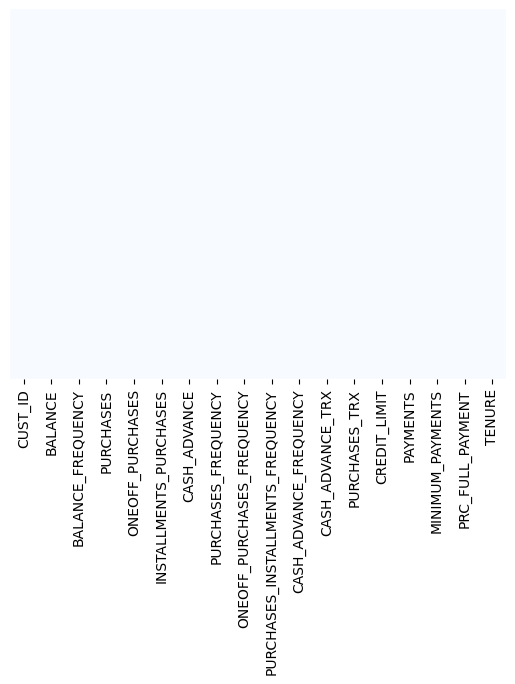

In [ ]:
 # creating heatmam again.
 sns.heatmap(creditcard_df_dropped_2.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
creditcard_df_dropped_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8939 entries, 0 to 8952
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8938 non-null   object 
 1   BALANCE                           8939 non-null   float64
 2   BALANCE_FREQUENCY                 8939 non-null   float64
 3   PURCHASES                         8939 non-null   float64
 4   ONEOFF_PURCHASES                  8939 non-null   float64
 5   INSTALLMENTS_PURCHASES            8939 non-null   float64
 6   CASH_ADVANCE                      8939 non-null   float64
 7   PURCHASES_FREQUENCY               8939 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8939 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8939 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8939 non-null   float64
 11  CASH_ADVANCE_TRX                  8939 non-null   float64
 12  PURCHA

In [ ]:
# Let's drop Customer ID since it has no meaning here
# Strip leading/trailing whitespace from column names
creditcard_df_dropped_2.columns = creditcard_df_dropped_2.columns.str.strip()

# Drop the column
column_to_drop = "CUST_ID"
if column_to_drop in creditcard_df_dropped_2.columns:
    creditcard_df_dropped_2.drop(column_to_drop, axis=1, inplace=True)

print(creditcard_df_dropped_2)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8948    28.493517           1.000000     291.12              0.00   
8949    19.183215           1.000000     300.00              0.00   
8950    23.398673           0.833333     144.40              0.00   
8951    13.457564           0.833333       0.00              0.00   
8952   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [ ]:
creditcard_df_dropped_2.info()
creditcard_df_dropped_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8939 entries, 0 to 8952
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8939 non-null   float64
 1   BALANCE_FREQUENCY                 8939 non-null   float64
 2   PURCHASES                         8939 non-null   float64
 3   ONEOFF_PURCHASES                  8939 non-null   float64
 4   INSTALLMENTS_PURCHASES            8939 non-null   float64
 5   CASH_ADVANCE                      8939 non-null   float64
 6   PURCHASES_FREQUENCY               8939 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8939 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8939 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8939 non-null   float64
 10  CASH_ADVANCE_TRX                  8939 non-null   float64
 11  PURCHASES_TRX                     8939 non-null   float64
 12  CREDIT

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.642540,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8948,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8949,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,864.642540,0.000000,6.0
8950,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8951,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


# TASK #3: VISUALIZE AND EXPLORE DATASET

In [ ]:
creditcard_df_dropped_2.describe()
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9 It means most of the customer updates their balance freequently.
# Purchases average is $1000 it means customer gets cash advance by purchesing.
# one off purchase average is ~$600
# Average purchases frequency is around 0.5 means half of customer uses credit cart freequently.
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000,8939.000000
mean,1564.743210,0.877272,1003.456048,592.682887,411.073747,979.798876,0.490289,0.202251,0.364489,0.135279,3.251846,14.714030,4491.633449,1732.269458,864.642540,0.153653,11.517230
std,2081.771669,0.236879,2137.663271,1660.809694,904.553756,2098.009410,0.401333,0.298101,0.397433,0.200166,6.827266,24.868621,3638.680590,2894.607310,2331.903600,0.292353,1.338863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.083639,0.888889,39.815000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1575.000000,383.252592,170.819231,0.000000,12.000000
50%,874.571604,1.000000,361.490000,38.000000,89.370000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.058280,335.657631,0.000000,12.000000
75%,2054.678104,1.000000,1110.090000,576.980000,468.625000,1114.121124,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.185878,864.642540,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Let's see who made one off purchase of $40761! customer who expended maximum money
creditcard_df_dropped_2[creditcard_df_dropped_2['ONEOFF_PURCHASES'] == 40761.25]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1.0,101.0,22500.0,46930.59824,2974.069421,0.25,12.0


In [ ]:
creditcard_df_dropped_2['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
#to see the user who used the maximum amount of cash advanced.
target_value = 47137.211760000006
Max_cash_Advance_user = creditcard_df_dropped_2[np.isclose(creditcard_df_dropped_2['CASH_ADVANCE'], target_value)]
Max_cash_Advance_user

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123.0,21.0,19600.0,39048.59762,5394.173671,0.0,12.0


In [ ]:
creditcard_df_dropped_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.642540,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [ ]:
# to see how many columns I have in this creditcard_df_dropped_2 dataframe now.
n = len(creditcard_df_dropped_2.columns)
n

17

In [ ]:
#printing all cloumn
creditcard_df_dropped_2.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

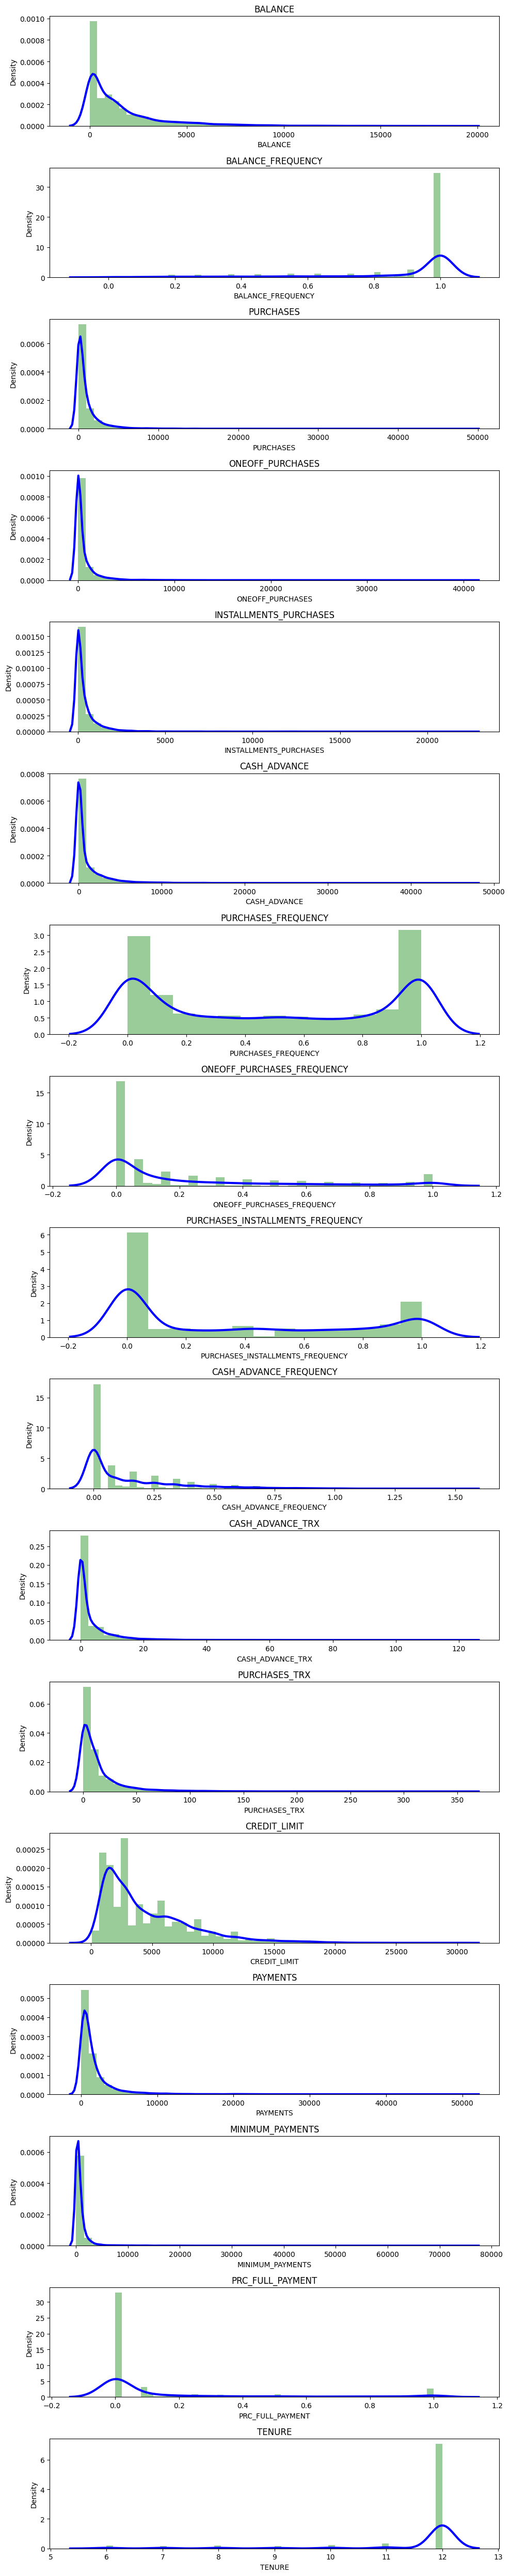

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df_dropped_2.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df_dropped_2[creditcard_df_dropped_2.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df_dropped_2.columns[i])

plt.tight_layout()

In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [ ]:
correlations = creditcard_df_dropped_2.corr()


<Axes: >

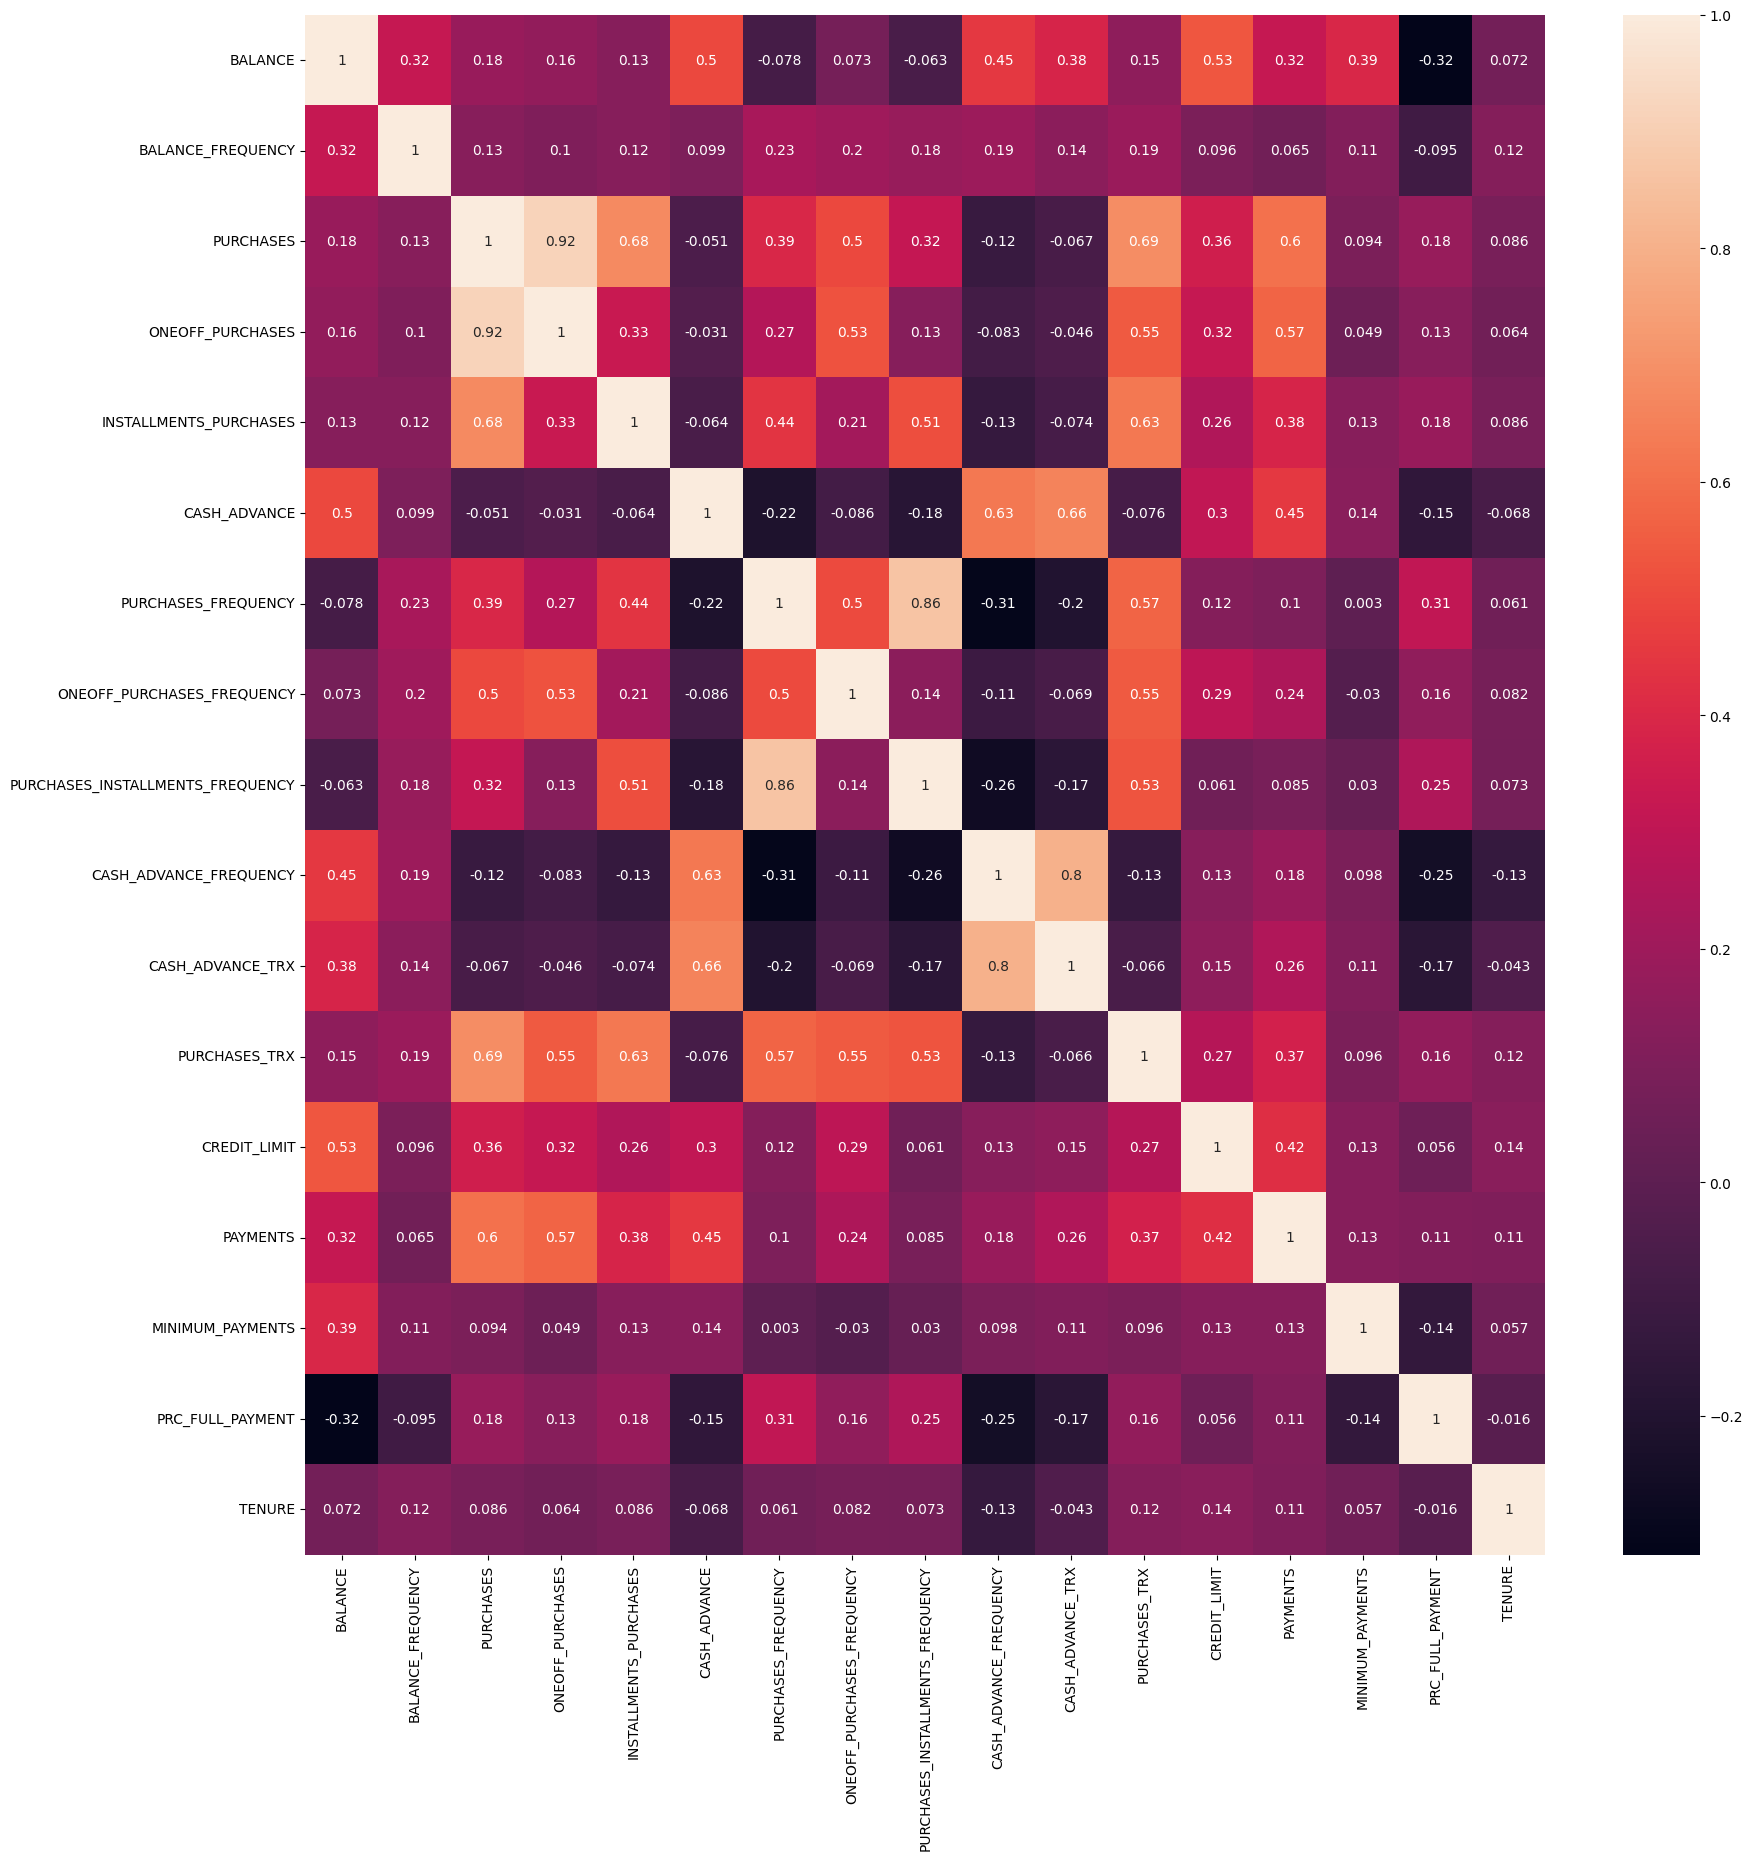

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first
scaler = StandardScaler() # to Scale the Data set
creditcard_df_dropped_2_scaled = scaler.fit_transform(creditcard_df_dropped_2)

In [ ]:
creditcard_df_dropped_2_scaled.shape

(8939, 17)

In [ ]:
creditcard_df_dropped_2_scaled

array([[-0.73203403, -0.24946519, -0.42481286, ..., -0.31097911,
        -0.52560139,  0.36060242],
       [ 0.78674133,  0.13433462, -0.46944353, ...,  0.08907285,
         0.23455667,  0.36060242],
       [ 0.44695473,  0.51813442, -0.10773396, ..., -0.10179281,
        -0.52560139,  0.36060242],
       ...,
       [-0.7404418 , -0.18550066, -0.40188935, ..., -0.33546324,
         0.32957729, -4.12106304],
       [-0.74521738, -0.18550066, -0.46944353, ..., -0.34689777,
         0.32957729, -4.12106304],
       [-0.57263812, -0.88913153,  0.04200801, ..., -0.33294559,
        -0.52560139, -4.12106304]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

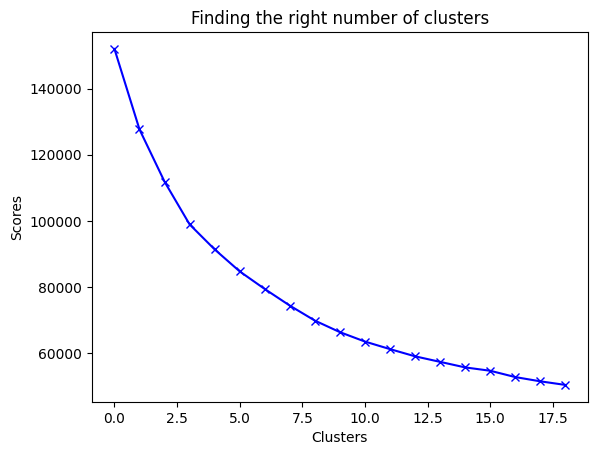

In [ ]:
scores_1 = []  # It is going to acumulate all the score.

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_dropped_2_scaled)
  scores_1.append(kmeans.inertia_) # it is WCSS parameter.

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# TASK #5: APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8) # selected 8 cluster from previous plot
kmeans.fit(creditcard_df_dropped_2_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_dropped_2_scaled)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 1, ..., 6, 6, 6], dtype=int32)

In [ ]:
labels

array([2, 7, 1, ..., 3, 2, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
# printing cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df_dropped_2.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700808,-2.139120,-0.309924,-0.234693,-0.301566,-0.320566,-0.553213,-0.441480,-0.438204,-0.521838,-0.376570,-0.418636,-0.174338,-0.191453,-0.256903,0.286454,0.205147
1,-0.120365,0.402668,0.580442,0.706275,0.074624,-0.332341,0.997381,1.916956,0.210178,-0.419393,-0.334293,0.665894,0.464030,0.170250,-0.156112,0.461238,0.275314
2,1.106140,0.475239,2.598234,1.863687,2.720102,-0.122441,1.169440,1.580285,1.290891,-0.262246,-0.122148,3.254108,1.349953,1.530550,0.616594,0.247346,0.335165
3,1.673484,0.394774,-0.220589,-0.156890,-0.233449,1.992584,-0.480549,-0.210841,-0.421413,1.910460,1.915176,-0.269904,1.014536,0.799653,0.547223,-0.395377,0.071818
4,0.006833,0.403654,-0.354070,-0.238982,-0.398097,-0.100213,-0.840492,-0.382531,-0.750599,0.093230,-0.035818,-0.477275,-0.307104,-0.251770,-0.013144,-0.454562,0.273518
5,-0.358192,0.332464,-0.029468,-0.240547,0.372175,-0.362816,0.997304,-0.379866,1.208231,-0.472471,-0.359858,0.195074,-0.256492,-0.213106,-0.029983,0.314454,0.255378
6,-0.334992,-0.349927,-0.287278,-0.213004,-0.287617,0.067550,-0.203815,-0.283766,-0.227605,0.307066,-0.000621,-0.387809,-0.561425,-0.391426,-0.208978,0.012967,-3.196332
7,1.865563,0.332909,12.590666,13.103758,5.695024,-0.004618,1.033573,2.173040,0.866123,-0.476750,-0.215213,4.564375,3.174912,8.992856,1.064030,1.237148,0.295651


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df_dropped_2.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.903271,0.370588,340.979382,202.924095,138.306387,307.286565,0.268279,0.070652,0.190342,0.030830,0.681049,4.303723,3857.309175,1178.119574,265.601969,0.237394,11.791878
1,1314.184787,0.972650,2244.176209,1765.604996,478.571213,282.582823,0.890548,0.773665,0.448016,0.051335,0.969670,31.272971,6179.997567,2225.048702,500.624335,0.288489,11.885816
2,3867.345034,0.989840,6557.295728,3687.738545,2871.414768,722.930974,0.959598,0.673309,0.877503,0.082789,2.417957,95.634675,9403.405573,6162.362902,2302.399845,0.225961,11.965944
3,5048.360222,0.970780,531.937120,332.133628,199.918764,5160.024700,0.297440,0.139402,0.197015,0.517667,16.326531,8.002268,8182.998351,4046.821224,2140.643527,0.038069,11.613379
4,1578.966467,0.972883,246.616195,195.801411,50.993808,769.562435,0.152991,0.088224,0.066193,0.153940,3.007322,2.845522,3374.243782,1003.534409,833.994105,0.020767,11.883412
5,819.111455,0.956021,940.467103,193.202743,747.707455,218.649226,0.890518,0.089018,0.844653,0.040712,0.795139,19.564980,3558.392957,1115.446581,794.728671,0.245579,11.859127
6,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.900373,599.308188,377.353513,0.157443,7.238019
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [ ]:
labels.shape # Labels associated to each data point

(8939,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
# concatenate the clusters labels to our original dataframe to see which data point belongs from which clusters
creditcard_df_dropped_2_cluster = pd.concat([creditcard_df_dropped_2, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_dropped_2_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,7.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.642540,0.000000,12.0,2.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2.0


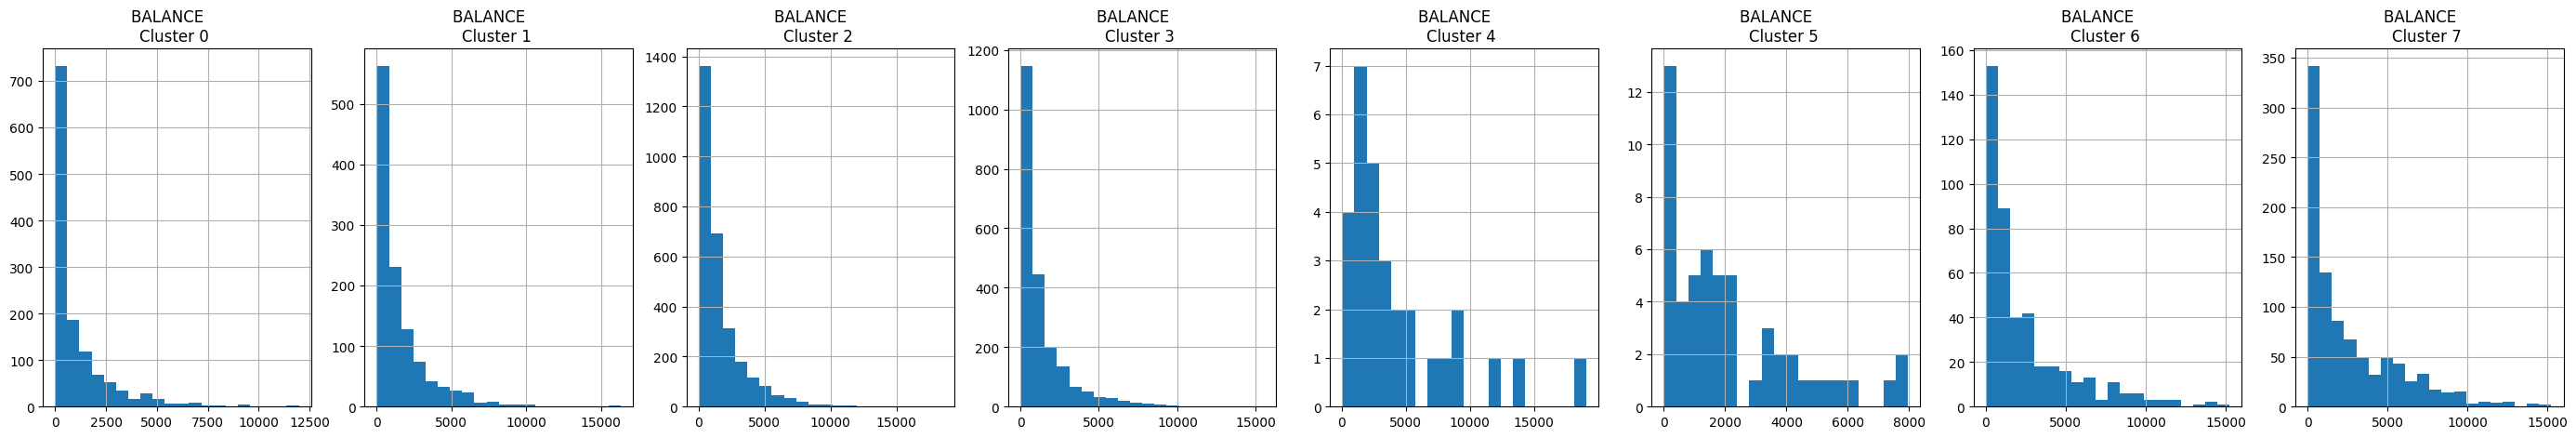

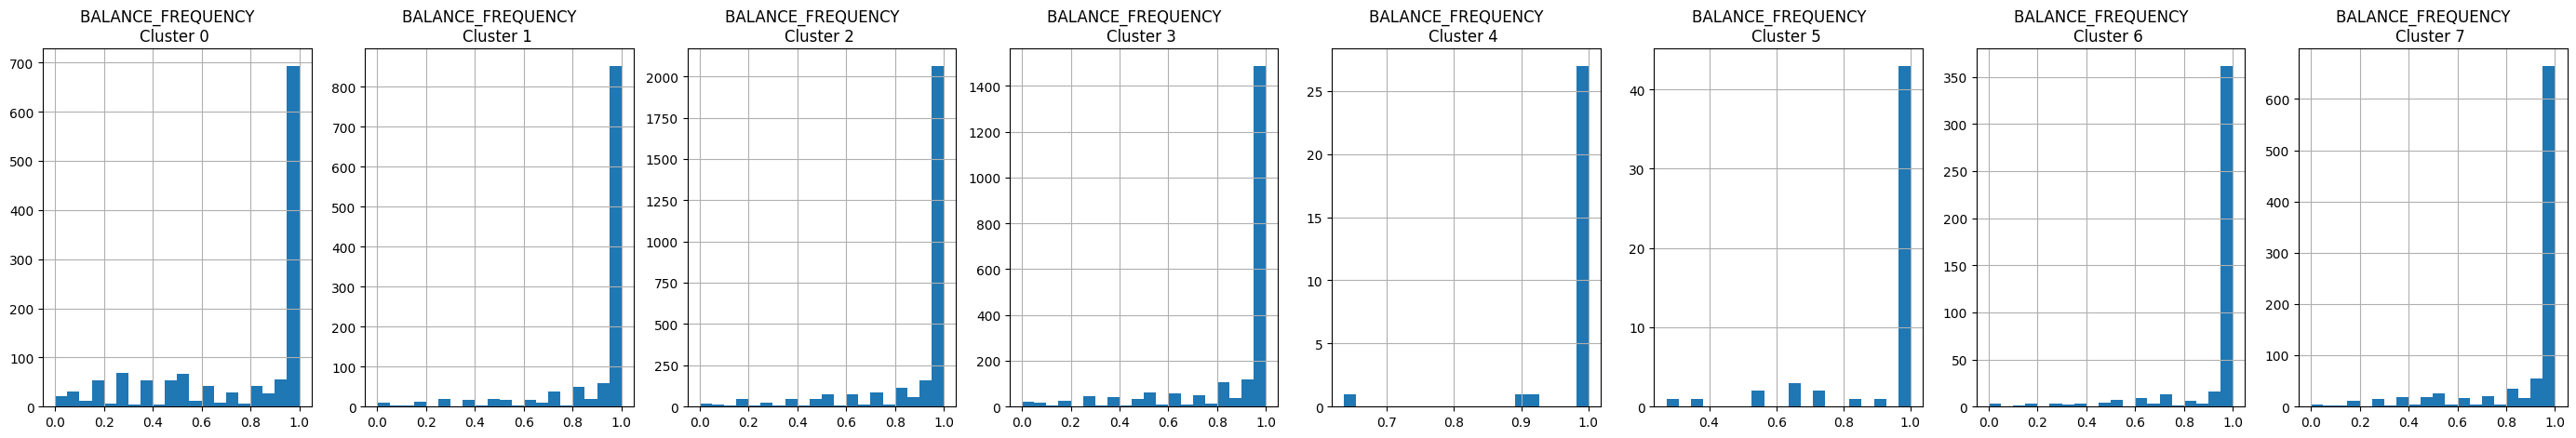

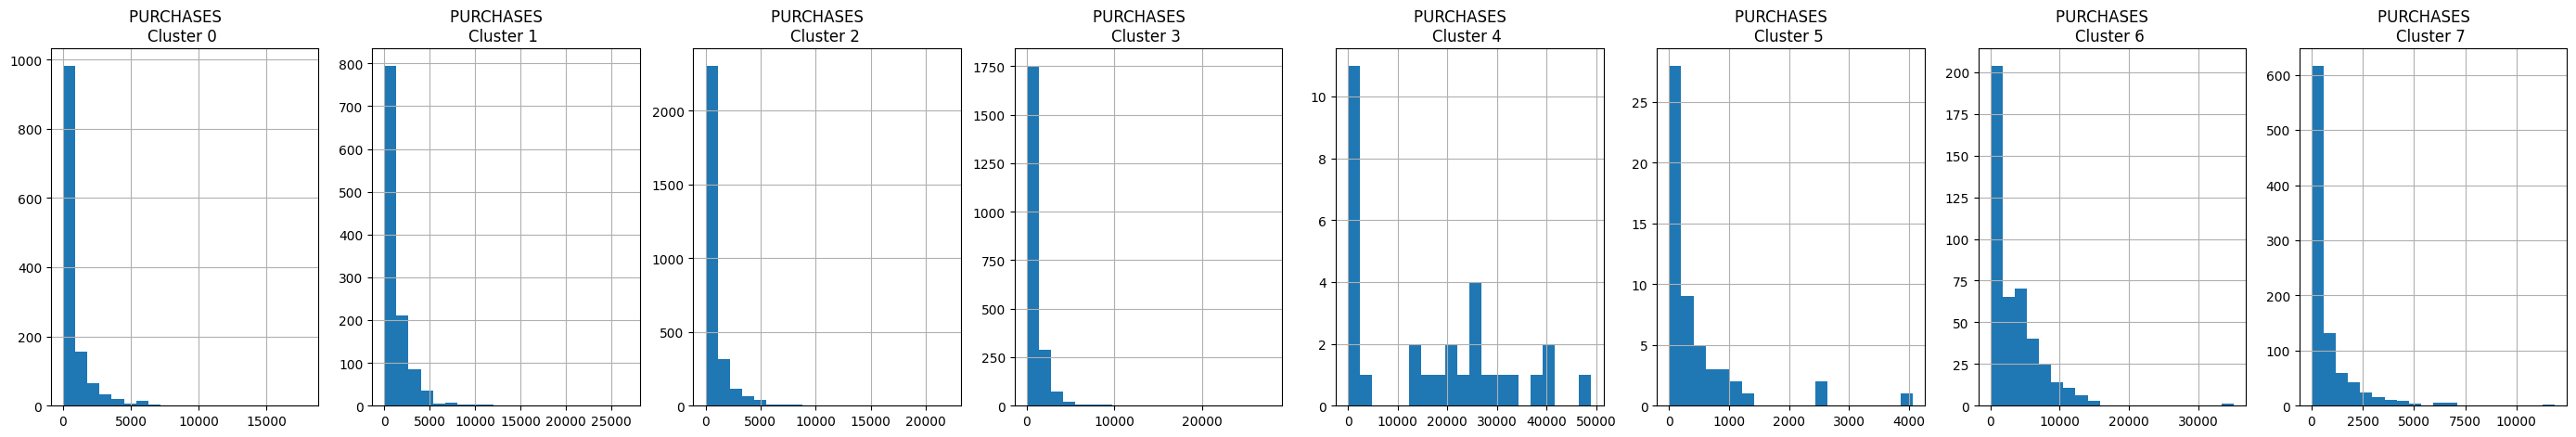

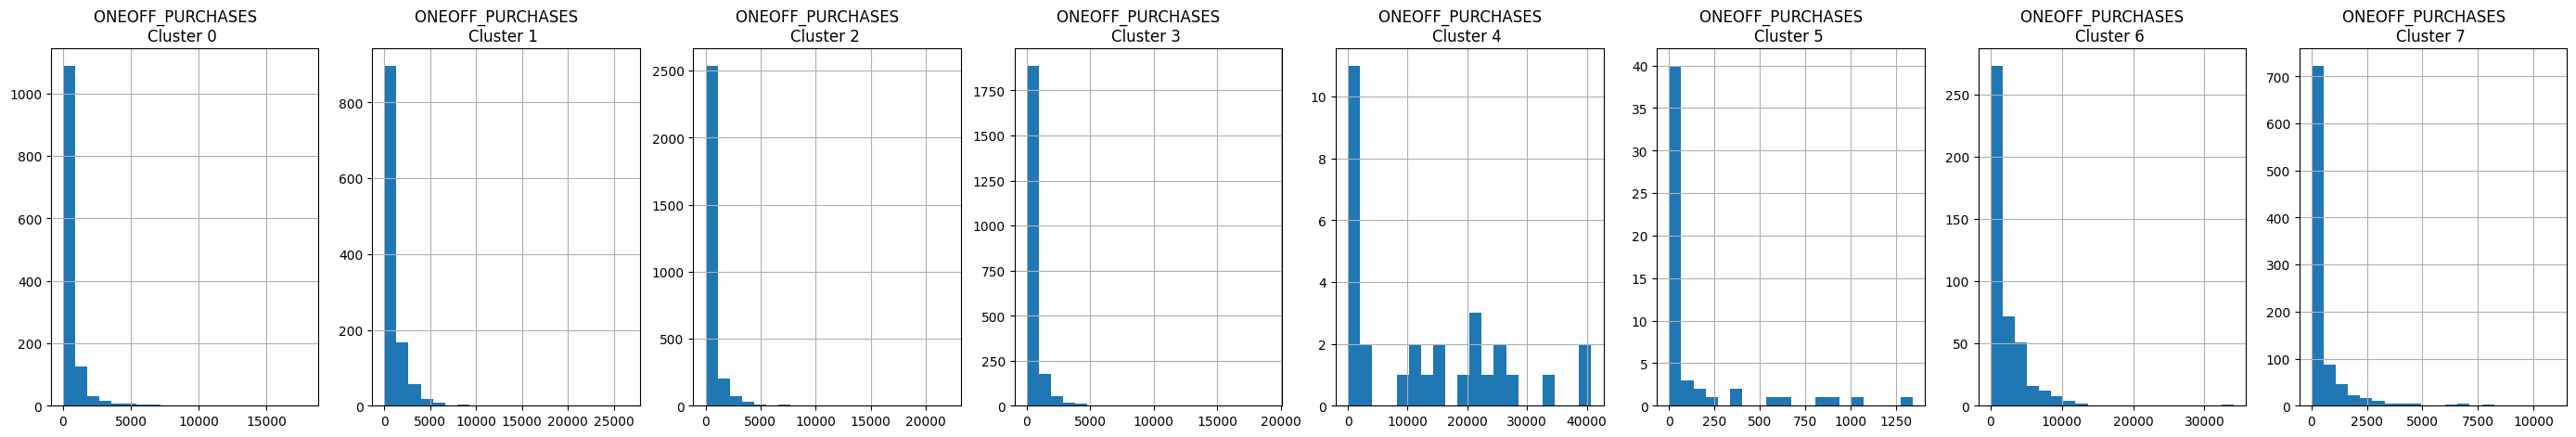

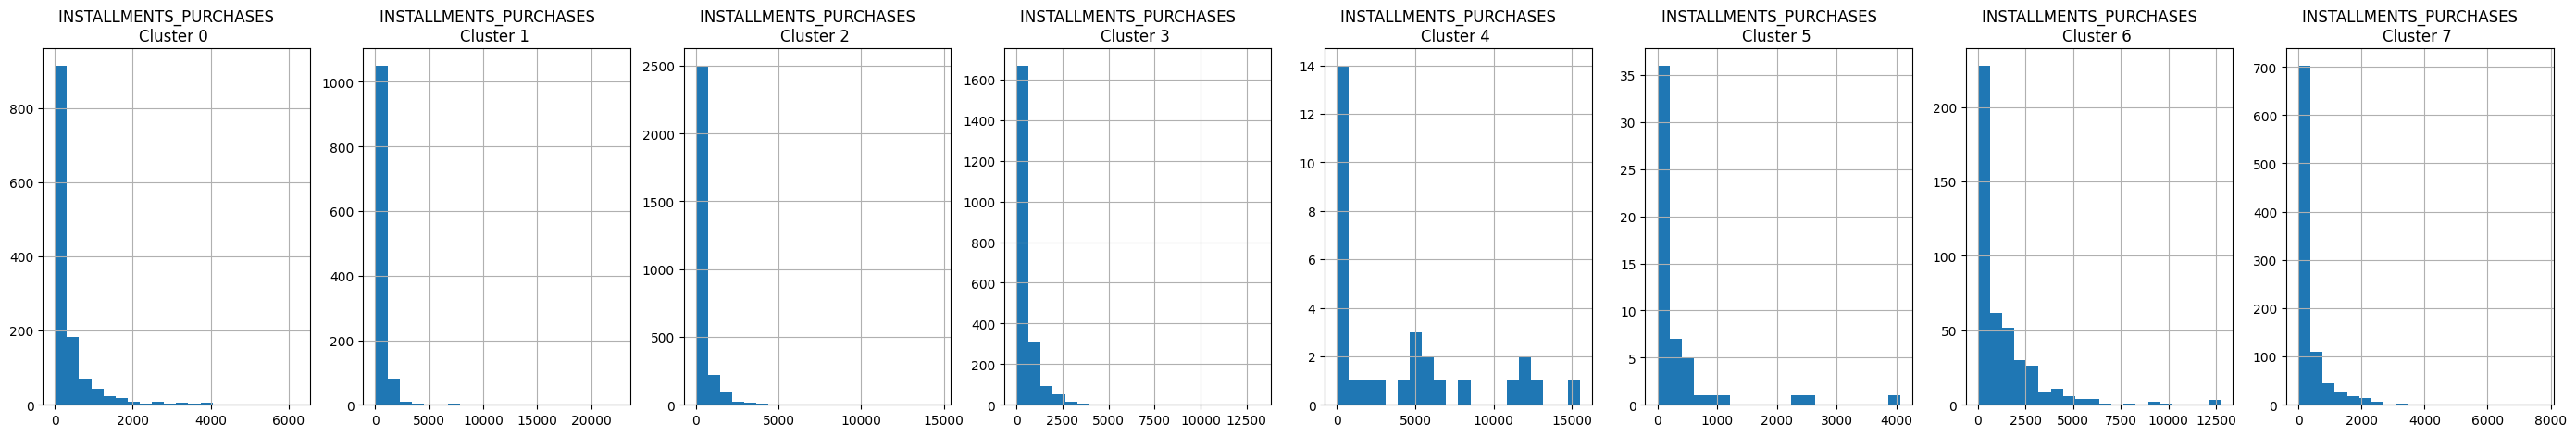

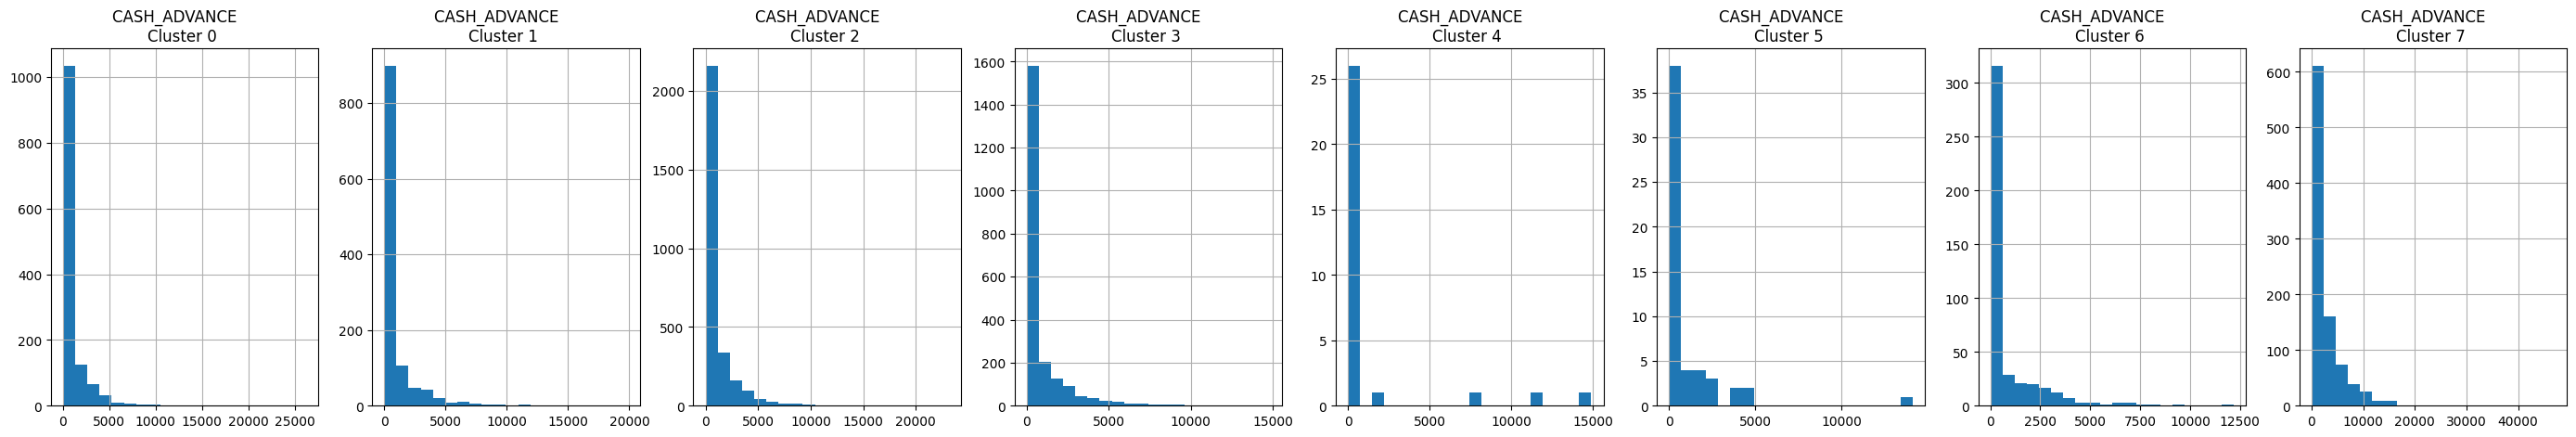

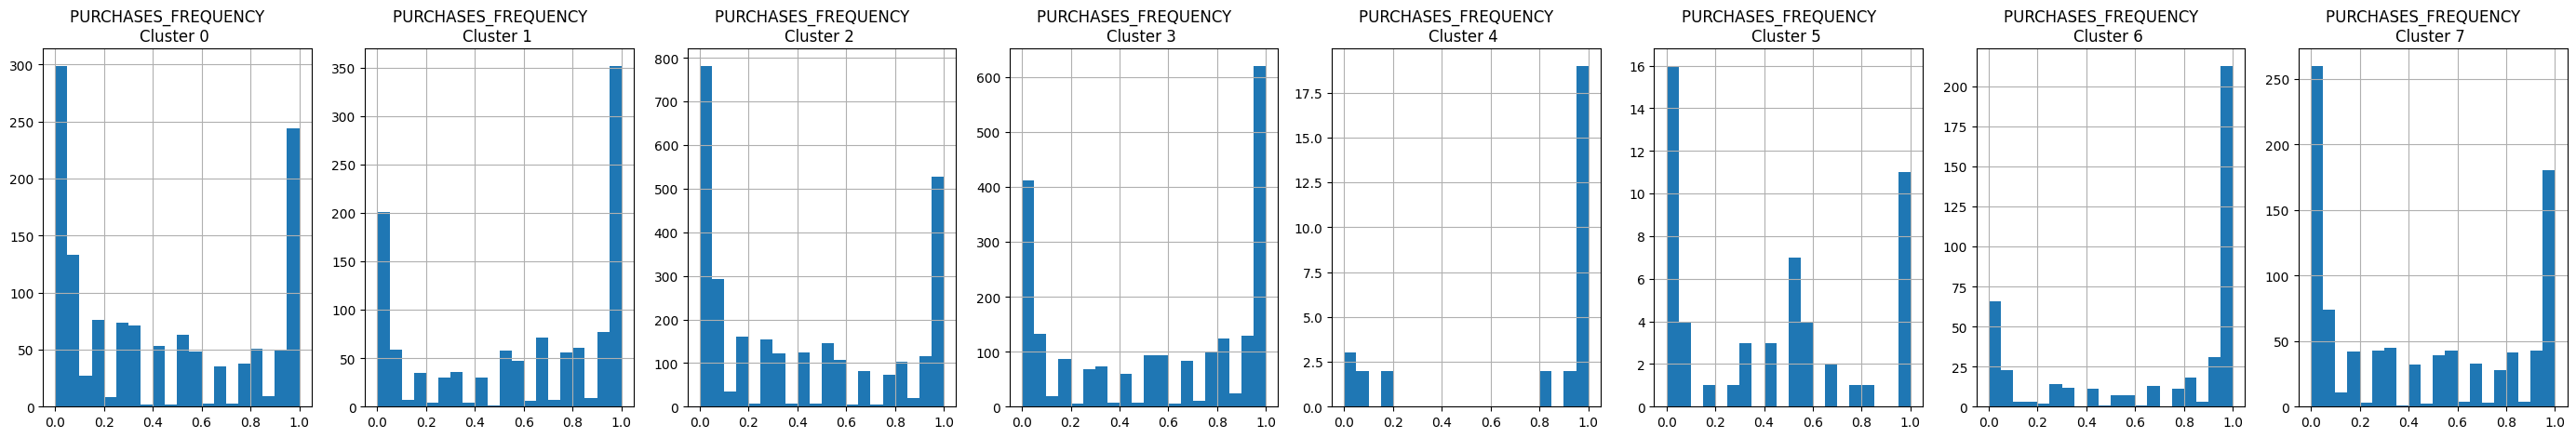

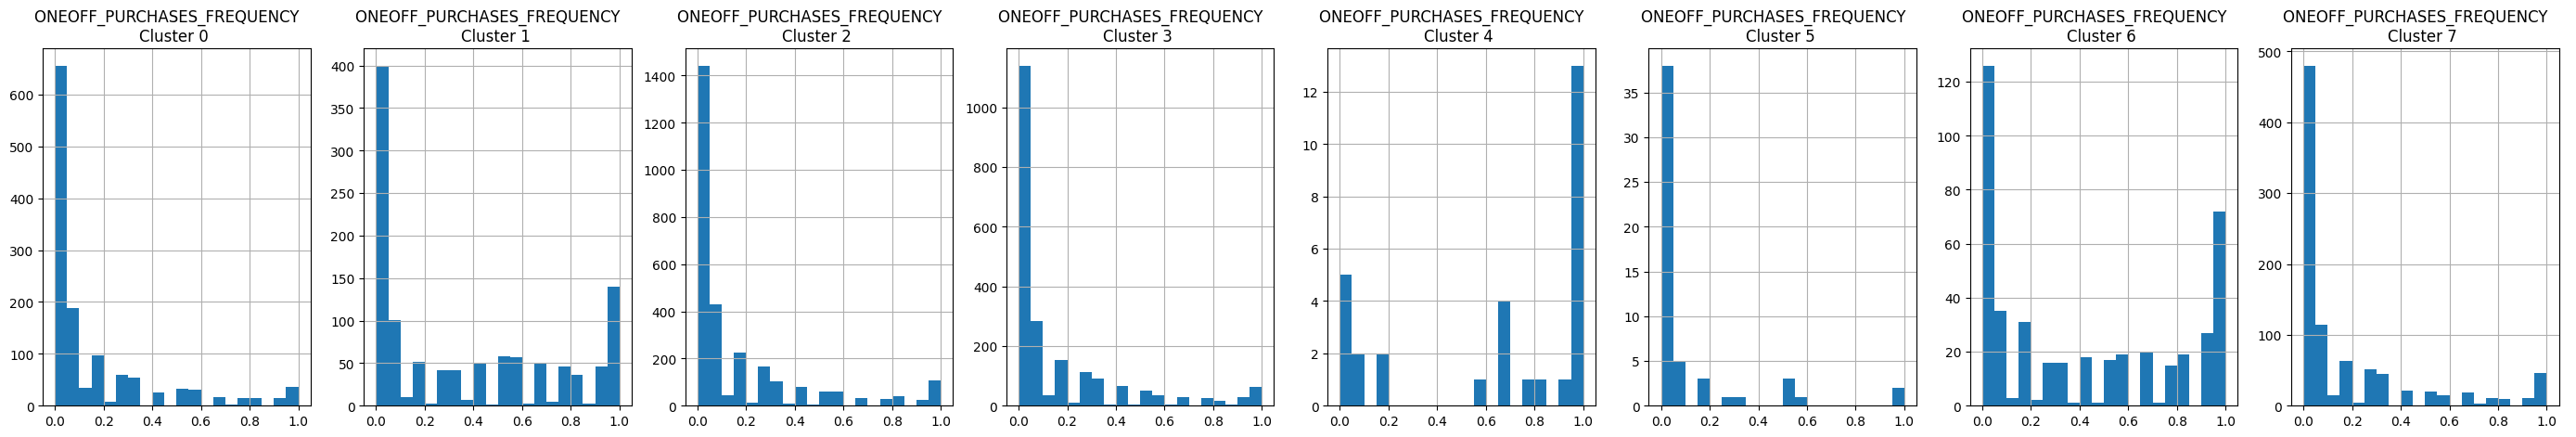

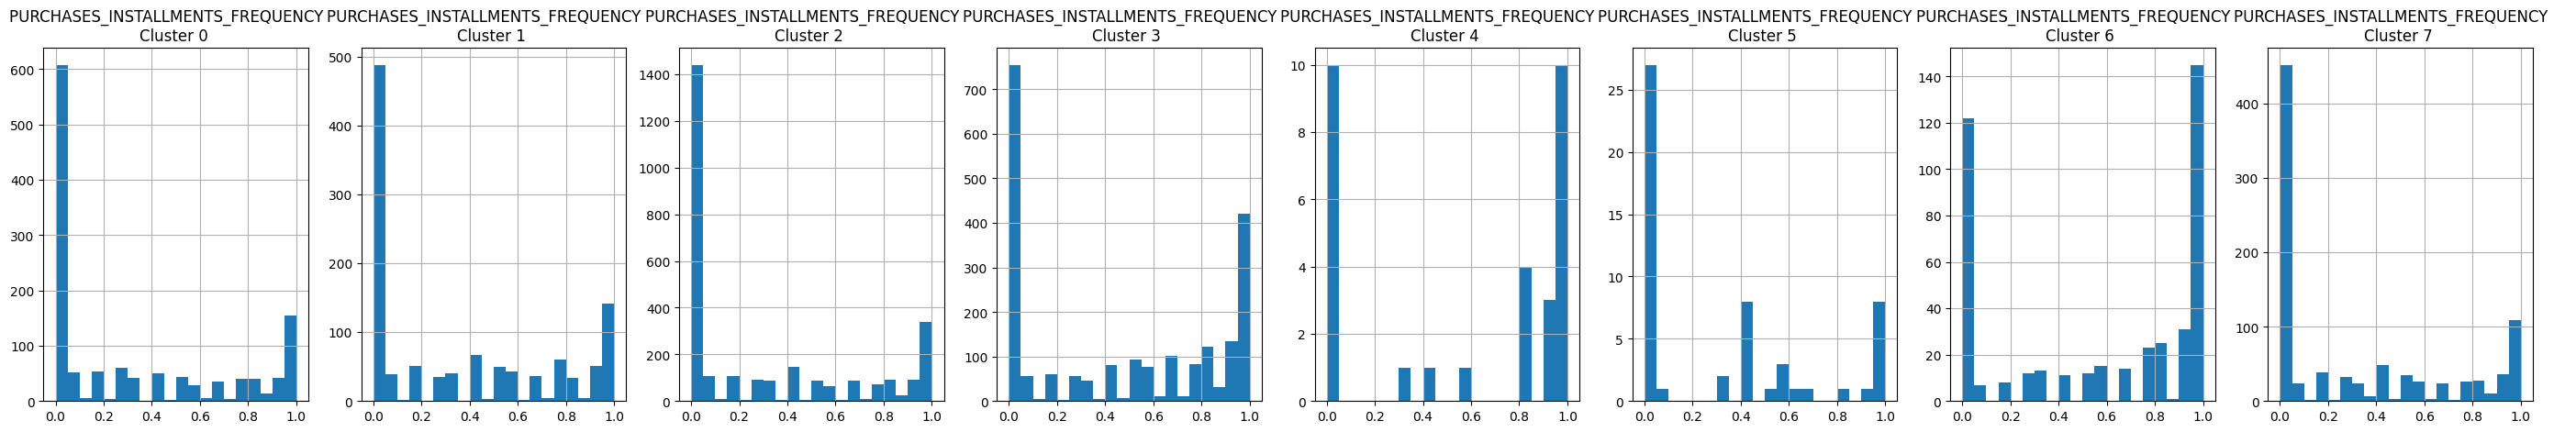

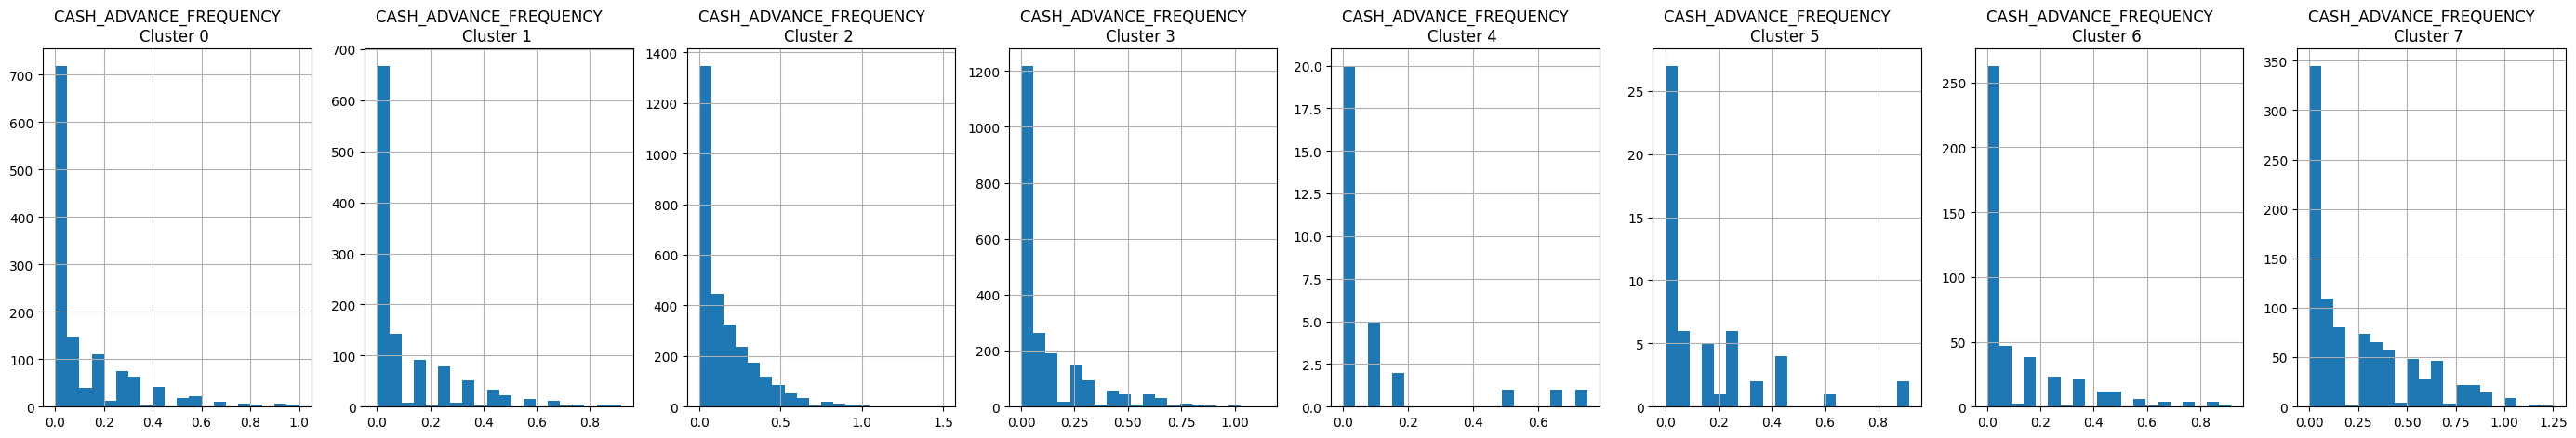

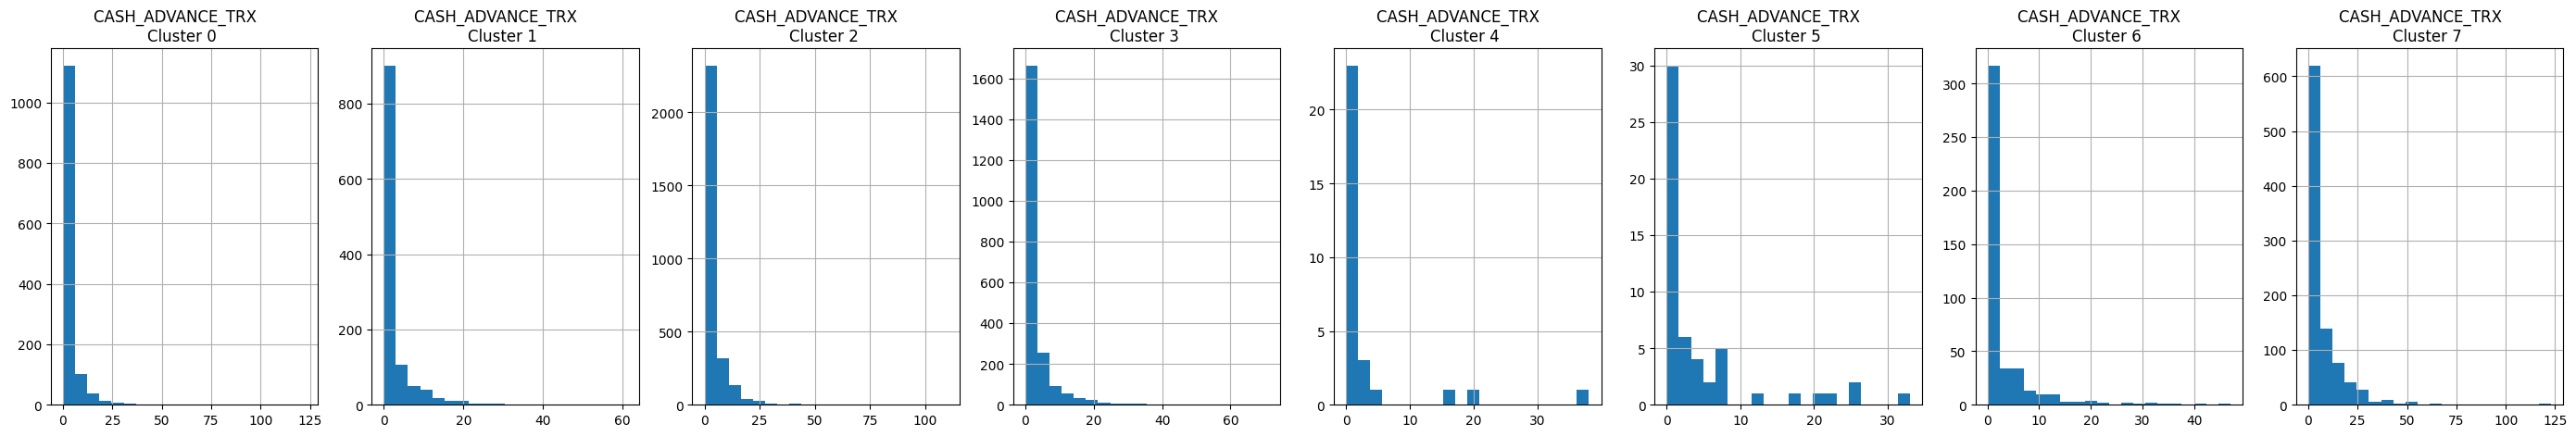

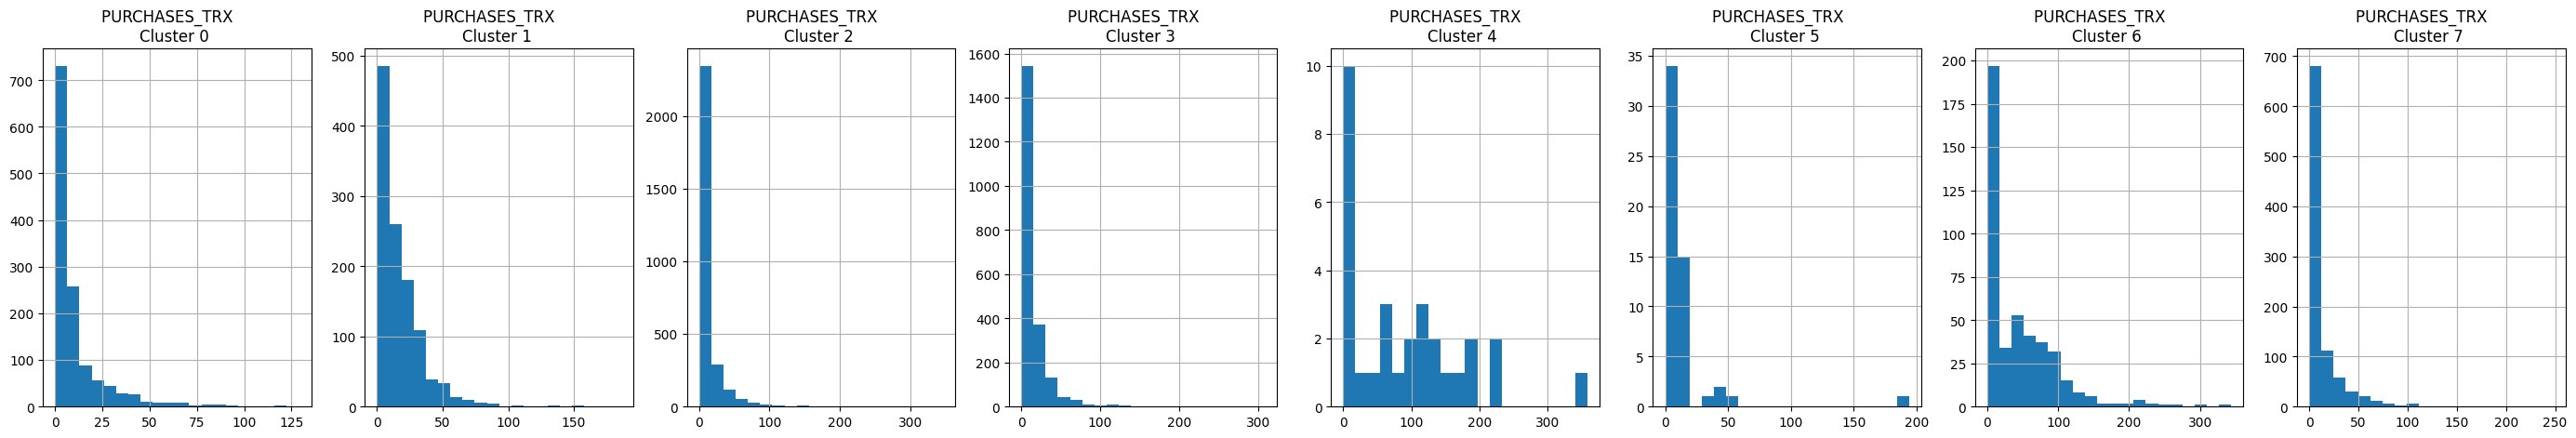

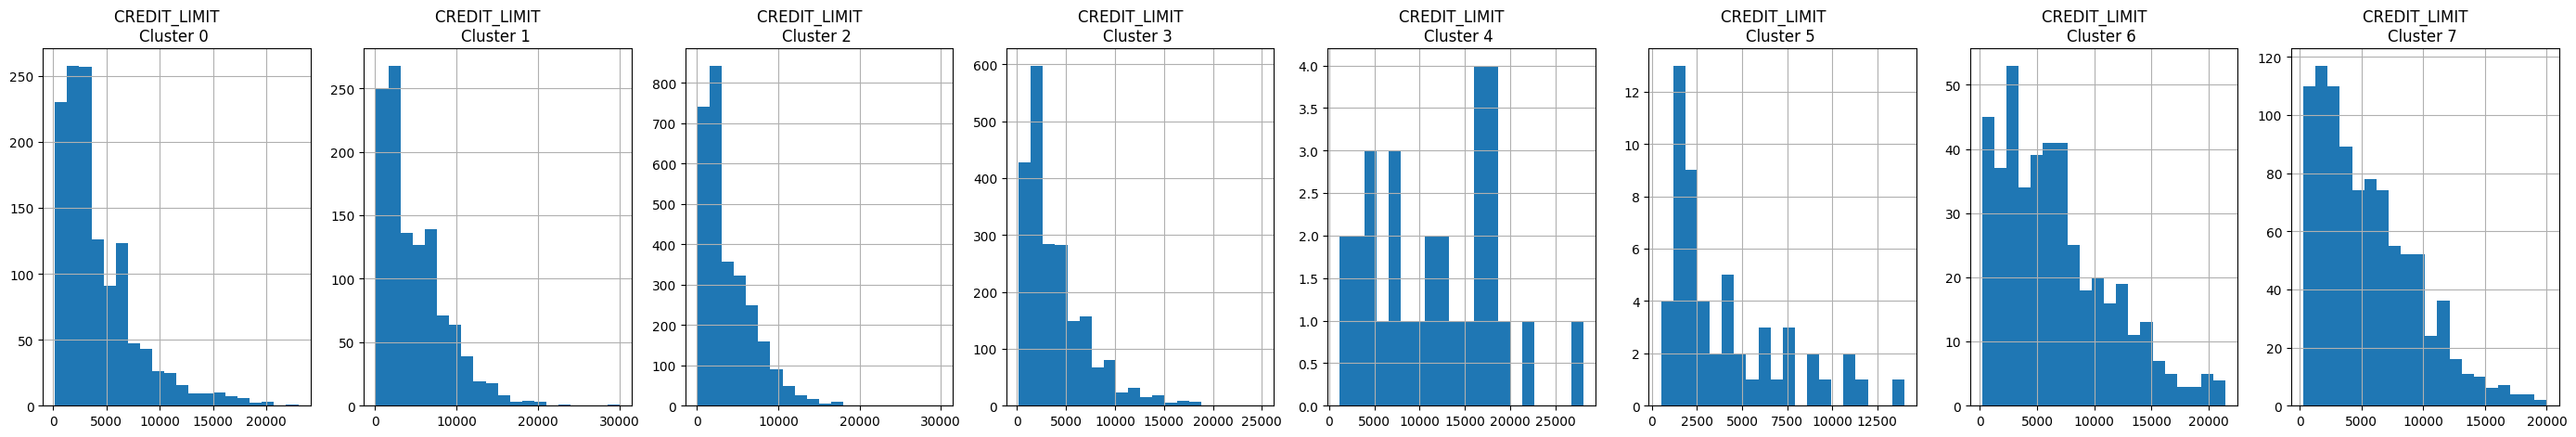

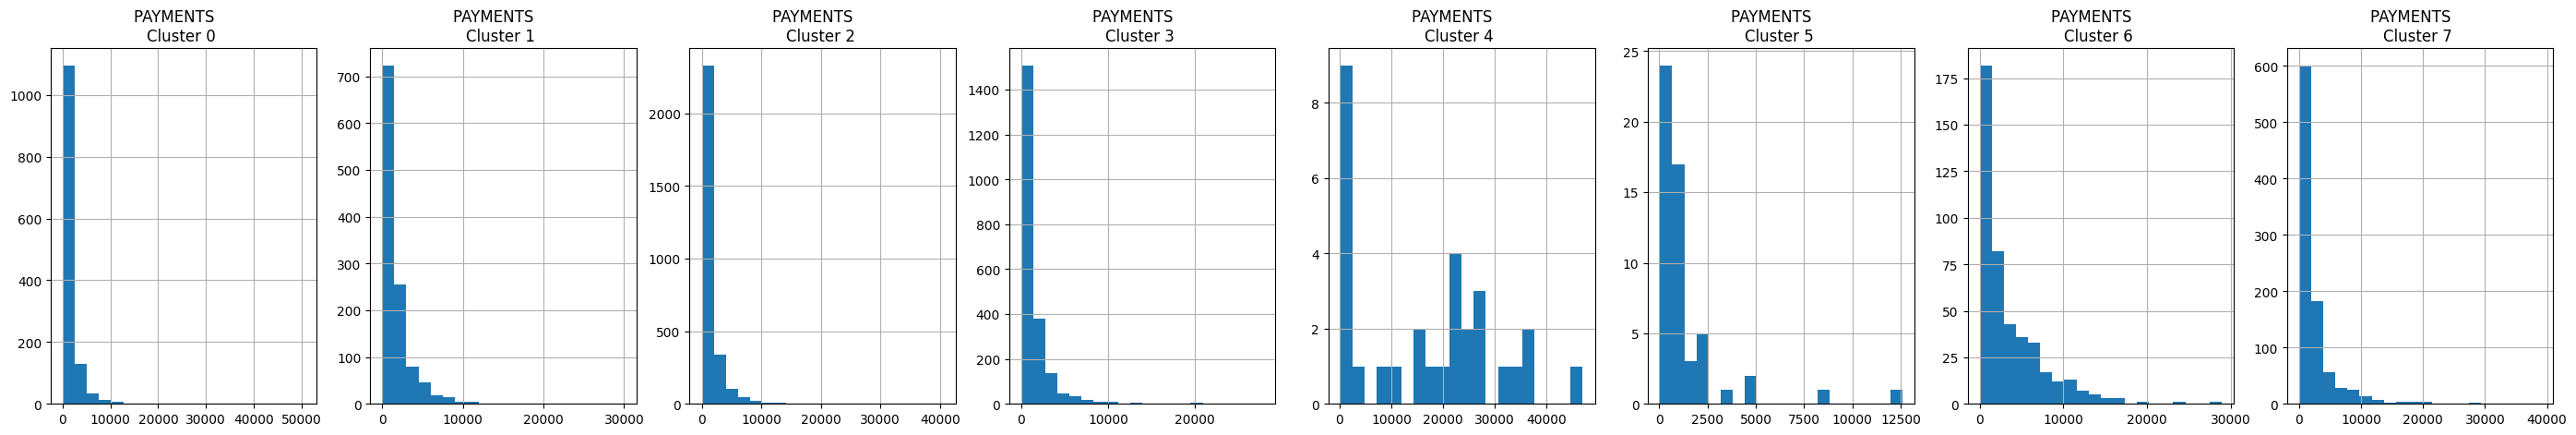

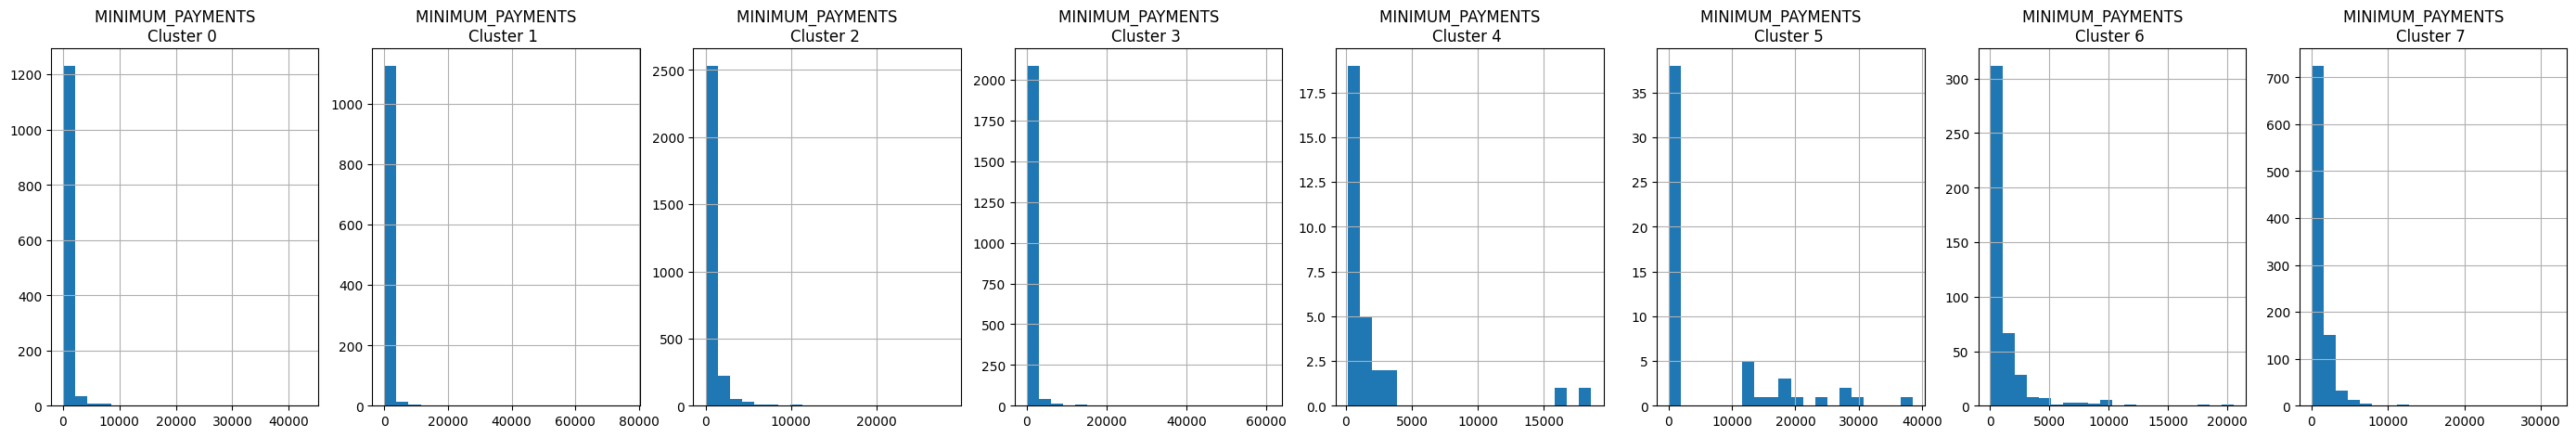

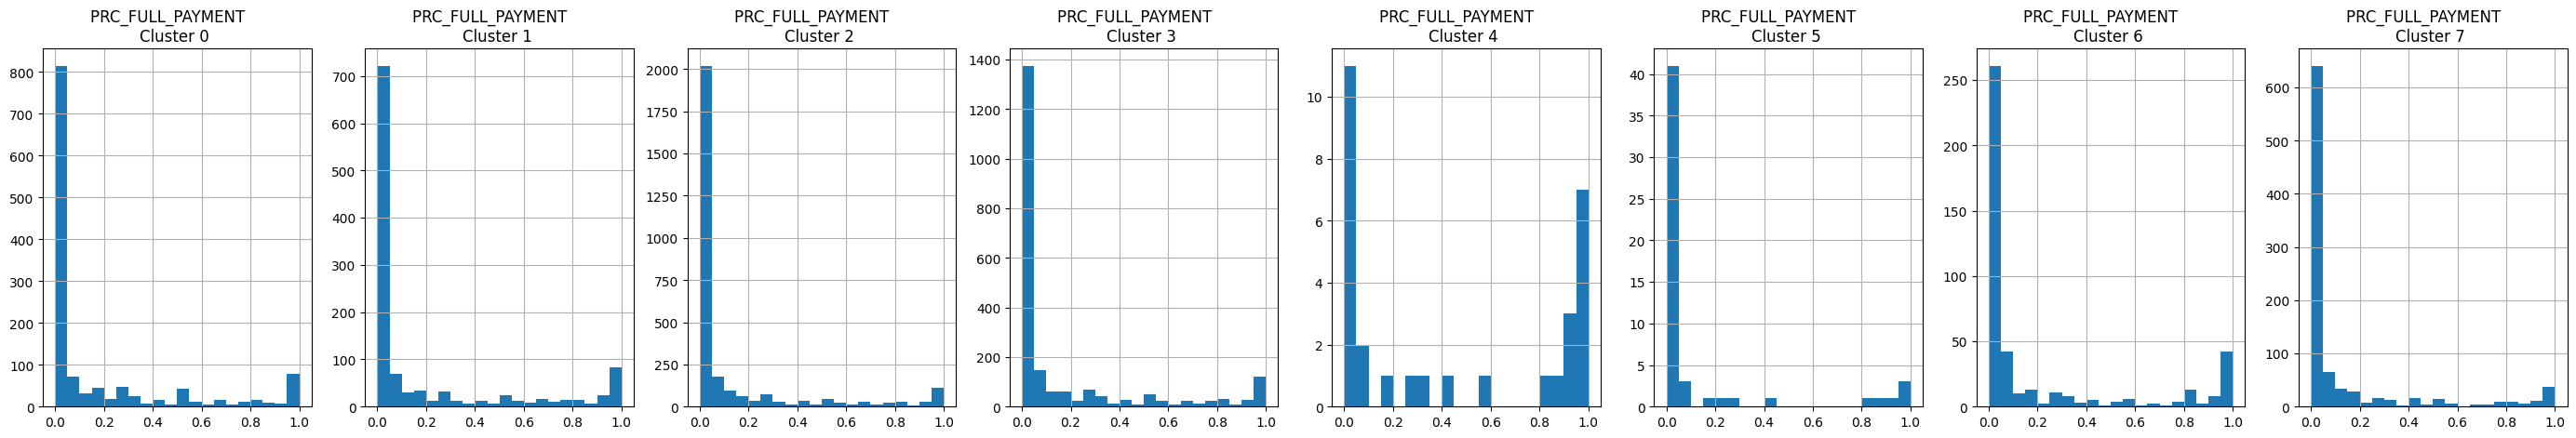

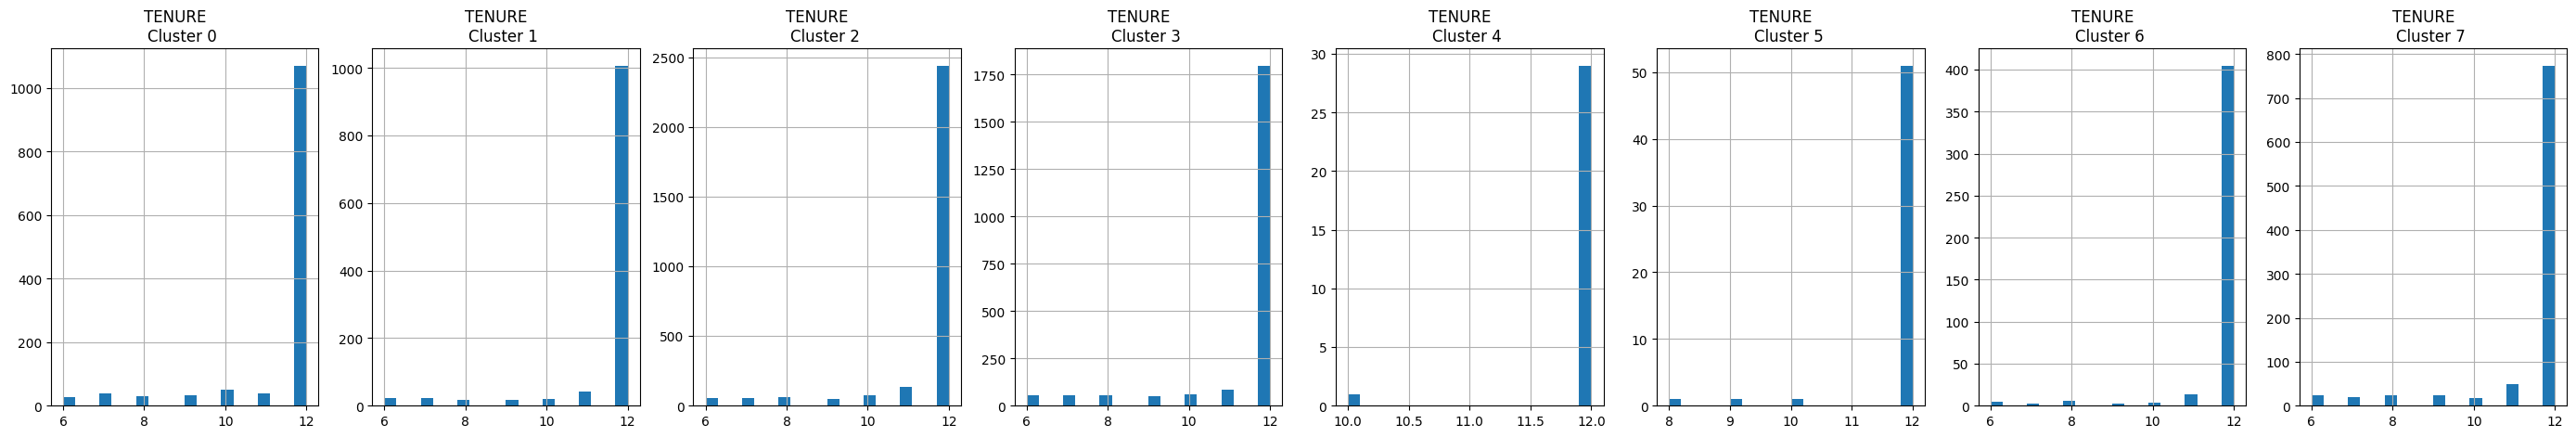

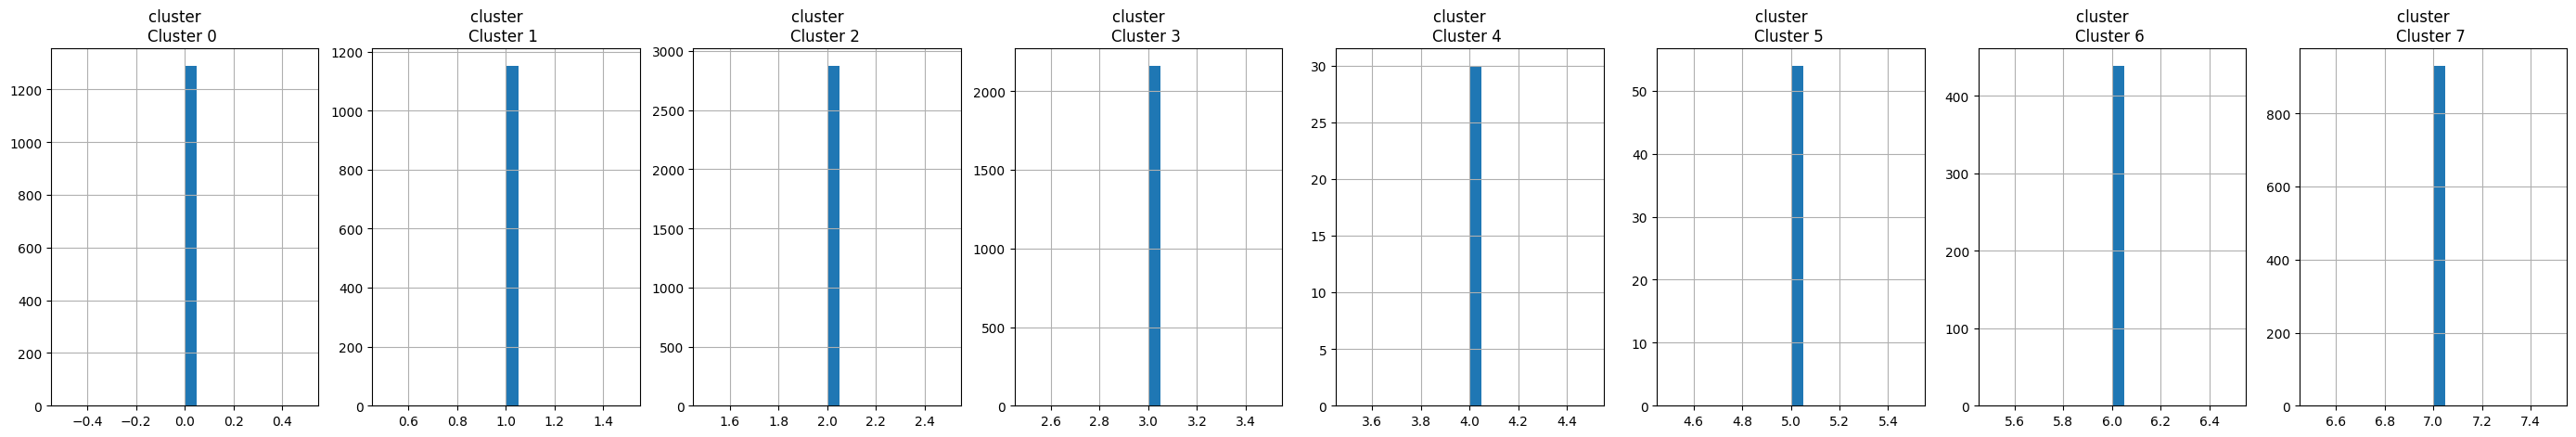

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df_dropped_2_cluster:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_dropped_2_cluster[creditcard_df_dropped_2_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()



# TASK 6: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_dropped_2_scaled)
principal_comp

array([[-1.68265517, -1.07523276],
       [-1.13568531,  2.50648841],
       [ 0.9705655 , -0.38406692],
       ...,
       [-0.92725232, -1.8102607 ],
       [-2.33658984, -0.65610905],
       [-0.55607079, -0.39998487]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682655,-1.075233
1,-1.135685,2.506488
2,0.970566,-0.384067
3,-0.873143,0.043928
4,-1.599447,-0.687412


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682655,-1.075233,2
1,-1.135685,2.506488,7
2,0.970566,-0.384067,1
3,-0.873143,0.043928,2
4,-1.599447,-0.687412,2


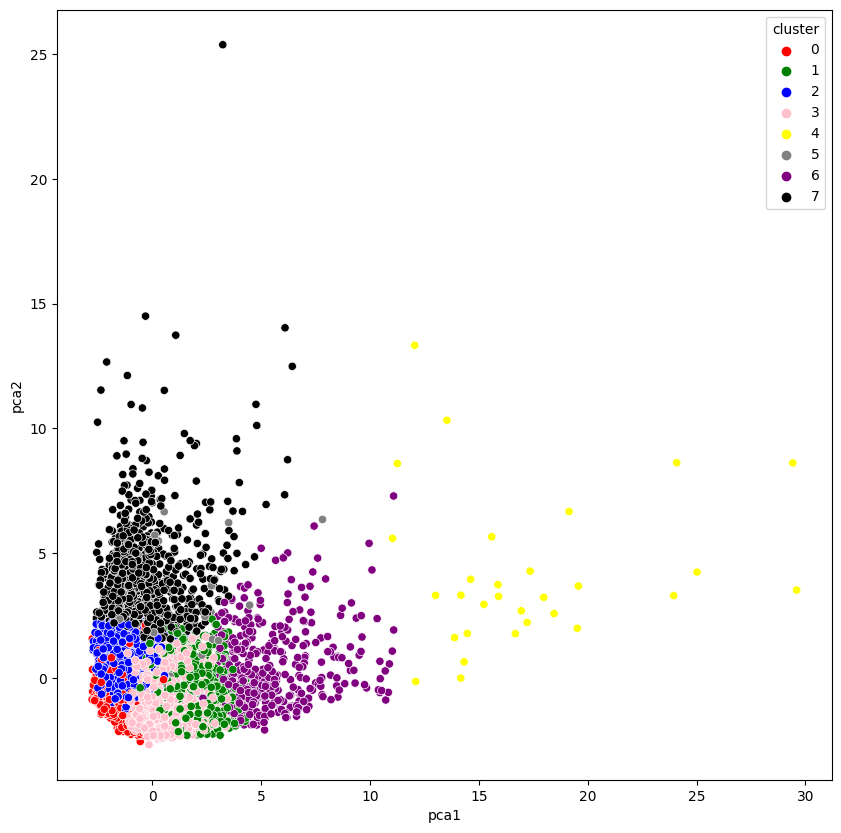

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #7: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
#It's what we call it xavier normal initializer, and it's simply draw samples from a truncated normal distribution.
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD #for optamization

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
creditcard_df_dropped_2_scaled.shape

(8939, 17)

In [ ]:
autoencoder.fit(creditcard_df_dropped_2_scaled, creditcard_df_dropped_2_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 51ms/step - loss: 0.5292
Epoch 2/25
70/70 [==============================] - 3s 40ms/step - loss: 0.2985
Epoch 3/25
70/70 [==============================] - 2s 36ms/step - loss: 0.2277
Epoch 4/25
70/70 [==============================] - 2s 34ms/step - loss: 0.1967
Epoch 5/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1773
Epoch 6/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1588
Epoch 7/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1493
Epoch 8/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1364
Epoch 9/25
70/70 [==============================] - 3s 36ms/step - loss: 0.1298
Epoch 10/25
70/70 [==============================] - 2s 36ms/step - loss: 0.1223
Epoch 11/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1102
Epoch 12/25
70/70 [==============================] - 3s 50ms/step - loss: 0.1025
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_dropped_2_scaled)

280/280 [==============================] - 1s 3ms/step


In [ ]:
pred.shape

(8939, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

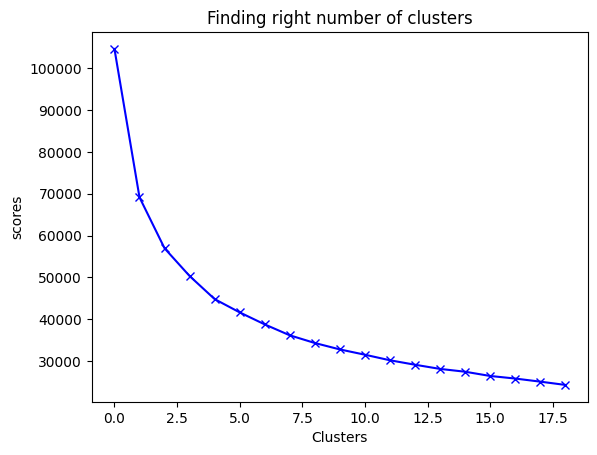

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

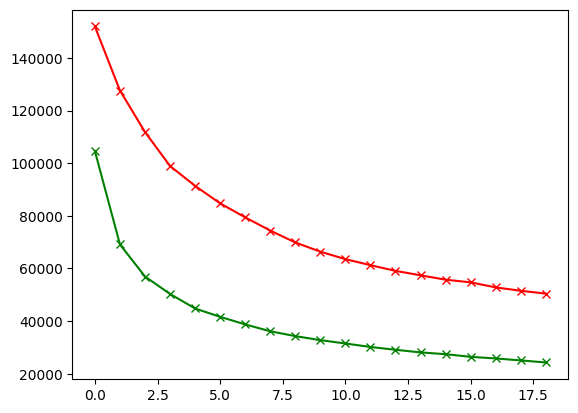

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_dropped_2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_cluster_dr = pd.concat([creditcard_df_dropped_2, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.642540,0.000000,12.0,3.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,3.0


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.256988,-0.258423
1,1.532151,-1.496379
2,-1.729990,0.796154
3,-2.006969,-0.417708
4,-2.277538,-0.244406


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.256988,-0.258423,3
1,1.532151,-1.496379,2
2,-1.729990,0.796154,3
3,-2.006969,-0.417708,3
4,-2.277538,-0.244406,3


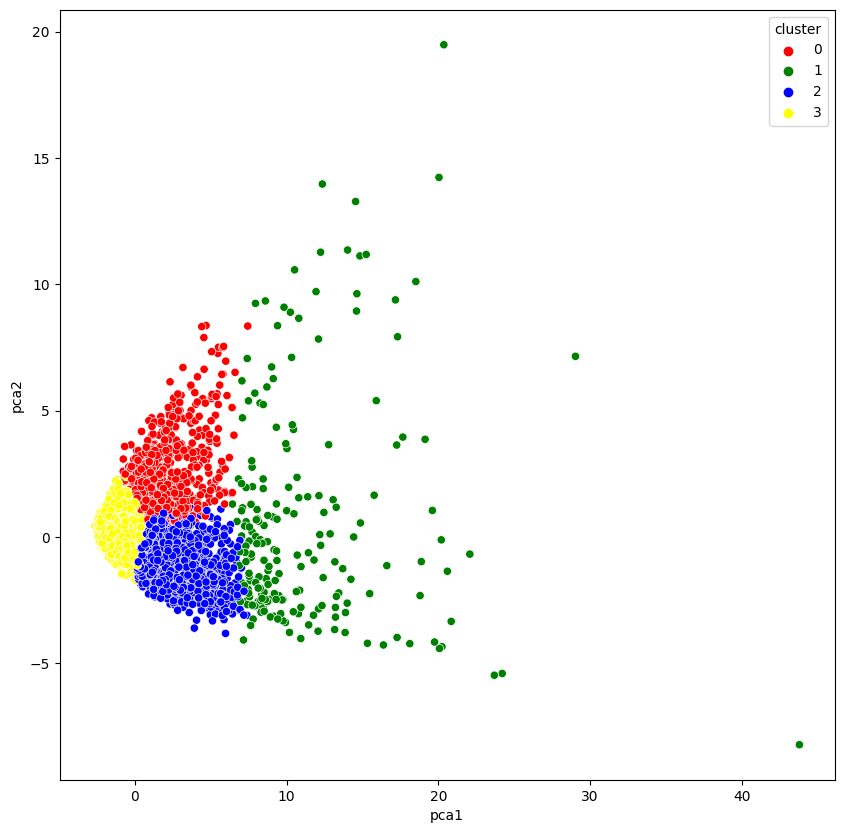

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

# --THE END--